In [1]:
pip install customdnn

Note: you may need to restart the kernel to use updated packages.


In [2]:
from customdnn.network_train import SplitData,TrainingDeepNetwork
from customdnn.network_predict import PredictDeepNetwork
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [6]:
## the data set has been taken from kaggle
data = pd.read_csv("diabetes.csv")

In [7]:
data.shape

(768, 9)

In [8]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [10]:
len(data[data.Outcome == 1]) ### number of 1s

268

In [11]:
len(data[data.Outcome == 0]) ## number of 0s

500

In [12]:
## splitting the features and target variable into x's and y
x = data.loc[:,data.columns != "Outcome"]
y = data.loc[:,data.columns =="Outcome"]

In [13]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [14]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [15]:
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


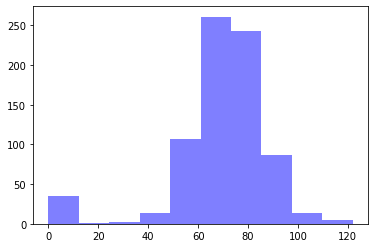

In [16]:
## like this other features can be plotted to check their distribution
num_bins = 10
plt.hist(data['BloodPressure'], num_bins, facecolor='blue', alpha=0.5)
plt.show()

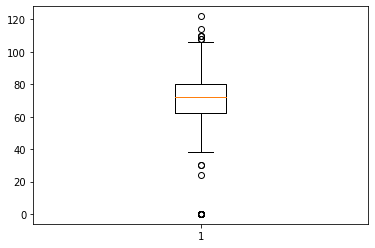

In [17]:
## similar analysis using boxplot
y_plot=list(data.BloodPressure)
plt.boxplot(y_plot)
plt.show()

In [18]:
feature_set=data.columns

In [19]:
feature_set

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [20]:
# Remove unwanted/redundant variables using Zero Variance technique
name_zero_var = []

for name in feature_set:
        try:
            if np.var(data.loc[name]) == 0:
                name_zero_var.append(name)
        except:
            continue

In [21]:
name_zero_var

[]

In [22]:
## Remove unwanted/redundant variables using Correlation technique
mycorr = data.loc[:,data.columns !='Outcome'].corr(method='pearson').abs()  
mycorr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,0.113970
Insulin,0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,0.113970,0.042163,0.036242,0.033561,1.000000


In [23]:
upper = mycorr.where(np.triu(np.ones(mycorr.shape), k=1).astype(np.bool))
upper

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,NaN,0.129459,0.141282,0.081672,0.073535,0.017683,0.033523,0.544341
Glucose,NaN,NaN,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,NaN,NaN,NaN,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,NaN,NaN,NaN,NaN,0.436783,0.392573,0.183928,0.113970
Insulin,NaN,NaN,NaN,NaN,NaN,0.197859,0.185071,0.042163
BMI,NaN,NaN,NaN,NaN,NaN,NaN,0.140647,0.036242
DiabetesPedigreeFunction,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.033561
Age,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [24]:
## drop columns which are high correlated
to_drop = [column for column in upper.columns if any(upper[column]>.99)]
to_drop

[]

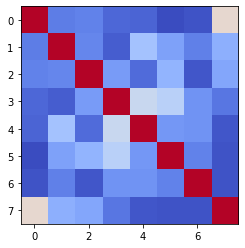

In [25]:
plt.imshow(mycorr, cmap='coolwarm')

In [26]:
## call the split function to split the data into train and test
## 15 - is the test data percentage i.e 15% of the data will be reserved for testing the DNN 
a = SplitData()
x_train,x_test,y_train,y_test = a.split_train_test(x, y, 15)

In [27]:
param = {}
b = TrainingDeepNetwork()

In [ ]:
##### this will return the updated dictionary of param (weights-w and bias -b) as updated after 1000 epochs 
param = b.train_network(x_train, y_train,learning_rate=.01,beta1=.9,beta2=.999,
                        batch_size=32,network_size=3,gradient="Adam",epoch_num=500)

In [29]:
c = PredictDeepNetwork()

In [31]:
## this will return array of predicted prob. for the test data input
y_pred = c.predict_proba(x_test, y_test, param,network_size=3)

In [32]:
y_pred

array([[5.79284511e-01, 5.79284511e-01, 5.79284511e-01, 5.79284511e-01,
        1.00000000e-04, 5.79284511e-01, 1.00000000e-04, 5.79284511e-01,
        5.79284511e-01, 1.00000000e-04, 5.79284511e-01, 5.79284511e-01,
        1.00000000e-04, 5.79284511e-01, 5.79284511e-01, 1.00000000e-04,
        5.79284511e-01, 5.79284511e-01, 5.79284511e-01, 1.00000000e-04,
        5.79284511e-01, 5.79284511e-01, 5.79284511e-01, 5.79284511e-01,
        5.79284511e-01, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
        5.79284511e-01, 5.79284511e-01, 5.79284511e-01, 5.79284511e-01,
        5.79284511e-01, 5.79284511e-01, 5.79284511e-01, 5.79284511e-01,
        5.79284511e-01, 1.00000000e-04, 1.00000000e-04, 5.79284511e-01,
        5.79284511e-01, 5.79284511e-01, 1.00000000e-04, 5.79284511e-01,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
        5.79284511e-01, 5.79284511e-01, 5.79284511e-01, 1.00000000e-04,
        1.00000000e-04, 1.00000000e-04, 5.79284511e-01, 1.000000

In [33]:
c = PredictDeepNetwork()

In [34]:
auc_nn = c.nn_auc(y_test, y_pred)
print(auc_nn)

0.662


In [35]:
cost_pred = c.comp_cost_pred(y_test, y_pred)
print(cost_pred)

0.9350023586013588
